# SD212: Graph mining
## Lab 2: Graph models

You will learn to generate random graphs.

## Import

In [1]:
import networkx as nx

The documentation is available [here](https://networkx.readthedocs.io/en/stable/).

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import warnings
warnings.filterwarnings('ignore')

## 1. Erdos-Renyi graphs

The `networkx` package contains functions to generate random graphs.

In [6]:
n = 200
p = 0.01

In [7]:
graph = nx.erdos_renyi_graph(n,p)

In [8]:
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 200
Number of edges: 191
Average degree:   1.9100


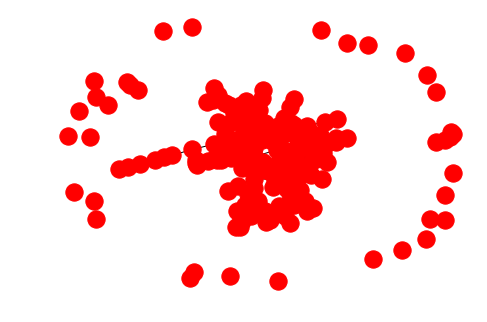

In [9]:
nx.draw(graph)

## To do

* Generate several instances of the graph and observe the results.
* Plot the average size of the largest connected component of the graph with respect to $p$. What is the critical value for $p$?
* Plot the average degree of nodes belonging to the largest connected component with respect to $p$. Compare this value to $np$ and interpret the results.

**Hint:** Use the function ```max(nx.connected_component_subgraphs(graph), key = len)``` to get the largest connected component of the graph.

In [10]:
#list(nx.connected_component_subgraphs(graph))[5].nodes)
len(max(nx.connected_component_subgraphs(graph),key= len).nodes)

164

In [11]:
def count_max_neigbor_node(graph):
    return len(max(nx.connected_component_subgraphs(graph),key= len).nodes)
count_max_neigbor_node(graph)

164

In [12]:
def average_connected_size(p):#50 iterations
    n = 200
    avg = 0
    n_iter = 25
    for i in range(n_iter):  
        graph = nx.erdos_renyi_graph(n,p)
        avg += count_max_neigbor_node(graph)
    return avg/n_iter
average_connected_size(0.01)

159.8

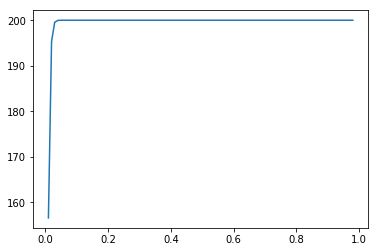

In [13]:
import numpy as np
import matplotlib.pyplot as plt
X = np.arange(0.01,0.99,0.01)
lst = [average_connected_size(p) for p in X]
plt.figure()
plt.plot(X,lst)
plt.show()


In [14]:
p_crit = 0.05

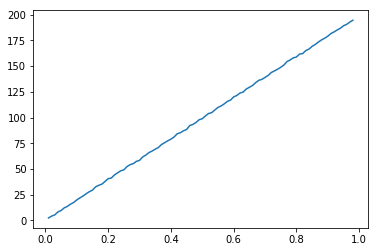

In [15]:
def average_subgraph_degree(p):
    n = 200
    graph = nx.erdos_renyi_graph(n,p)
    largest_subgraph = max(nx.connected_component_subgraphs(graph), key = len)
    return np.average([x[1] for x in list(largest_subgraph.degree)])

Y = [average_subgraph_degree(p) for p in X]
plt.figure()
plt.plot(X,Y)
plt.show()


## 2. Preferential attachment

The degree distribution of an Erdos-Renyi graph is approximately binomial (for large n), as shown below.

In [16]:
n = 200
p = 0.02
graph = nx.erdos_renyi_graph(n,p)

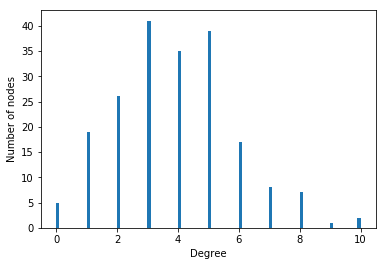

In [17]:
degrees = [graph.degree(u) for u in graph.nodes()]
plt.hist(degrees, bins = 100)
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.show()

The Barabasi-Albert model, based on the principle of **preferential attachment**, provides a random graph with a **power-law** degree distribution.

In [18]:
n = 200
d = 3 # degree of new nodes
graph = nx.barabasi_albert_graph(n, d) 
graph.add_edges_from(nx.complete_graph(d).edges()) # adding the initial clique (removed by networkx)

In [19]:
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 200
Number of edges: 594
Average degree:   5.9400


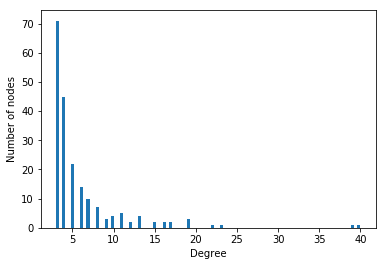

In [20]:
degrees = [graph.degree(u) for u in graph.nodes()]
plt.hist(degrees, bins = 100)
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.show()

## To do

* Code a function that generates a Barabasi-Albert graph starting from any initial graph (not necessarily a clique).
* Test your code on various initial graphs of 4 nodes.

In [21]:
list(graph.degree)

[(0, 6),
 (1, 10),
 (2, 39),
 (3, 22),
 (4, 40),
 (5, 16),
 (6, 13),
 (7, 23),
 (8, 7),
 (9, 19),
 (10, 12),
 (11, 16),
 (12, 15),
 (13, 11),
 (14, 8),
 (15, 10),
 (16, 10),
 (17, 11),
 (18, 19),
 (19, 8),
 (20, 13),
 (21, 12),
 (22, 7),
 (23, 17),
 (24, 8),
 (25, 17),
 (26, 5),
 (27, 13),
 (28, 11),
 (29, 15),
 (30, 19),
 (31, 9),
 (32, 11),
 (33, 5),
 (34, 9),
 (35, 7),
 (36, 8),
 (37, 6),
 (38, 11),
 (39, 3),
 (40, 6),
 (41, 8),
 (42, 3),
 (43, 3),
 (44, 8),
 (45, 7),
 (46, 5),
 (47, 7),
 (48, 4),
 (49, 6),
 (50, 6),
 (51, 4),
 (52, 9),
 (53, 4),
 (54, 7),
 (55, 5),
 (56, 5),
 (57, 7),
 (58, 7),
 (59, 13),
 (60, 6),
 (61, 5),
 (62, 4),
 (63, 3),
 (64, 3),
 (65, 5),
 (66, 5),
 (67, 3),
 (68, 3),
 (69, 4),
 (70, 8),
 (71, 4),
 (72, 6),
 (73, 5),
 (74, 3),
 (75, 3),
 (76, 10),
 (77, 7),
 (78, 5),
 (79, 5),
 (80, 6),
 (81, 4),
 (82, 4),
 (83, 4),
 (84, 3),
 (85, 3),
 (86, 6),
 (87, 5),
 (88, 6),
 (89, 4),
 (90, 6),
 (91, 4),
 (92, 4),
 (93, 3),
 (94, 5),
 (95, 6),
 (96, 4),
 (97, 4),
 (

In [22]:
def general_barabasi_albert_graph(n, d, init_graph):
    # init_graph must be connected and must have between d and n nodes 
    graph = init_graph.copy()
    #the new nodes have degree d
    #the new final graph we want should have degreee n
    for i in range(n-d):
        ##add node of degree d, Its the d neighbors qre chosen at random among the d+t-1 existing nodes with proba proportionale to their degrees
        node = d+i
        graph.add_node(node)
        neighbour_degrees = [x[1] for x in list(graph.degree)]
        neighbour_probabilities = neighbour_degrees/np.sum(neighbour_degrees)
        neighbours = np.random.choice(len(graph),d,p=neighbour_probabilities)
        for neighbour in neighbours:
            graph.add_edge(u_of_edge=node,v_of_edge=neighbour)
        # to be completed
    # you may use the function np.random.choice
    return graph    

In [23]:
# To check
graph = general_barabasi_albert_graph(100, 3, nx.complete_graph(3))

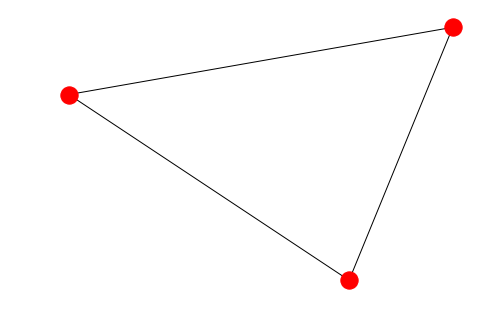

In [24]:
nx.draw(nx.complete_graph(3))

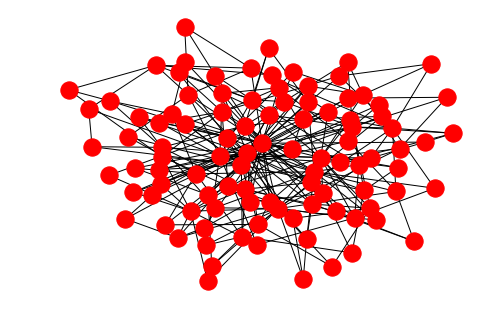

In [25]:
nx.draw(graph)

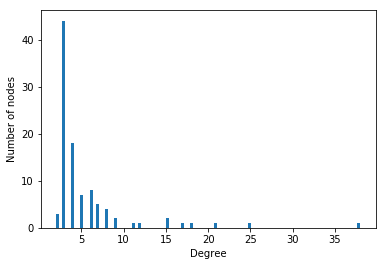

In [26]:
degrees = [graph.degree(u) for u in graph.nodes()]
plt.hist(degrees, bins = 100)
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.show()
#We recognize a power law

## 3. Configuration model

We now focus on graphs with some given degree sequence. The Havel-Hakimi algorithm generates such a graph provided the degree sequence is valid (that is, **graphical**); otherwise, it returns an error. The resulting graph is not necessarily connected.

In [27]:
graph = nx.havel_hakimi_graph([3,3,3,3])
#nodes have respectively 3,3,3 and 3 neighbours

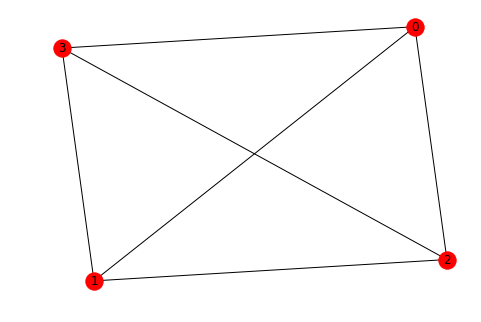

In [28]:
nx.draw(graph,with_labels=True)

## To do 

* Test various degree sequences (you may get valid sequences from actual graphs, see the [networkx graph generators](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html))

## Les Misérables

Les Misérables is a graph connecting the characters of the novel of Victor Hugo when they appear in the same chapter. The graph is undirected and weighted. Weights correspond to the number of chapters in which characters appear together.

Graph: [Download](http://perso.telecom-paristech.fr/~bonald/graphs/miserables.graphml.gz)

Source: [Source](https://fr.wikisource.org/wiki/Les_Misérables)

In [29]:
miserables = nx.read_graphml("miserables.graphml", node_type = int)

In [30]:
print(nx.info(miserables))

Name: Les Miserables
Type: Graph
Number of nodes: 77
Number of edges: 254
Average degree:   6.5974


In [31]:
names = nx.get_node_attributes(miserables, 'name')

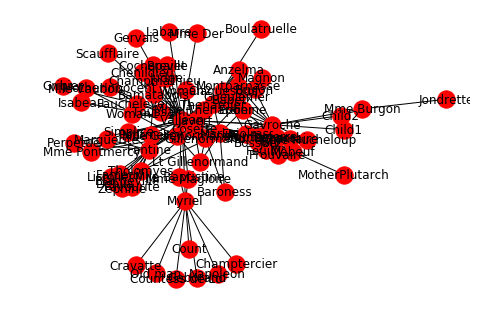

In [32]:
nx.draw(miserables, labels = names)

## To do

* Generate the Havel-Hakimi graph associated with the degree sequence of Les Miserables.
* How many connected components are there in this graph?
* How many common edges are there with the original graph ?

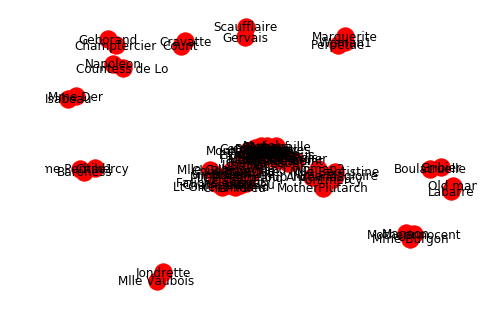

In [33]:
graph=nx.havel_hakimi_graph([x[1] for x in list(miserables.degree)])#These are the 12 connected component subgraphs
nx.draw(graph,labels = names)

In [34]:
connected_components = list(nx.connected_components(G=graph))
print(connected_components)

[{0, 2, 3, 11, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 34, 35, 36, 37, 38, 39, 41, 42, 43, 48, 49, 51, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76}, {1, 4}, {5, 6}, {8, 7}, {9, 10}, {33, 12, 30}, {13, 14}, {32, 15}, {40, 45}, {50, 44, 47}, {53, 46}, {56, 73, 52}]


In [35]:
print('there are : '+str(len(connected_components))+' connected components in Les Miserables graph')

there are : 12 connected components in Les Miserables graph


## Configuration model

The configuration model generates a random  instance of a **multi-graph** with some given  degree sequence. Any sequence of even sum is valid. Self-loops and multi-edges must be removed to get a simple graph.

In [36]:
config = nx.configuration_model([2,4])

In [37]:
print(nx.info(config))

Name: 
Type: MultiGraph
Number of nodes: 2
Number of edges: 3
Average degree:   3.0000


In [38]:
graph = nx.Graph(config)
graph.remove_edges_from(config.selfloop_edges())

In [39]:
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000


## To do

* Test various degree sequences.
* Generate random configurations associated with the degree sequence of Les Miserables.
* What is the average number of common edges with the original graph?
* What is the average number of common edges between the original graph of Les Miserables and an Erdos-Renyi graph of the same size (77 nodes and 254 edges on average)?
* Interpret the results.

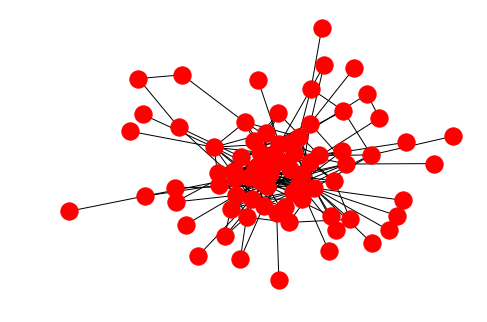

In [40]:
config = nx.configuration_model([x[1] for x in list(miserables.degree)])
graph = nx.Graph(config)
nx.draw(graph)

In [41]:
def common_edges_count(g1,g2):
    return sum(el1 == el2 * 1 for el1, el2 in zip(list(g1.edges),list(g2.edges)))

In [42]:
common_edges_count(miserables,graph)

3

In [43]:
#average over 1000 iterations
L = []
for i in range(1000):
    config = nx.configuration_model([x[1] for x in list(miserables.degree)])
    graph = nx.Graph(config)
    L.append(common_edges_count(miserables,graph))
np.average(L)

1.73

For this bit, let's use a little bit of probability theory:
The number of edges on average is : $\mathbb{E}[Sn] = p\begin{pmatrix}n \\ 2 \end{pmatrix}$

Therefore, $p = \frac{m}{\begin{pmatrix}n \\ 2 \end{pmatrix}}$

With m the nb of edges

In [44]:
p = 254*2/(77*76)
p

0.08680792891319207

In [45]:
L = []
for i in range(1000):
    graph = nx.erdos_renyi_graph(77,p)
    L.append(common_edges_count(miserables,graph))
np.average(L)

0.23100000000000001

In [46]:
len(nx.erdos_renyi_graph(77,p).edges())

262